<h1> 
    Datacamp - Personalized Medicine: Redefining Cancer Treatment
</h1>

<h4>
    <ul>
        <li>
            Team: The GOATs
        </li>
        <li>
            Members: BLIASHINETS Viktoria, NDIAYE Mohamed, ORTEGA Antoine
        </li>
    </ul>
</h4>

<h2>
    Introduction
</h2>

There have been huge expectation these past years on how data sciences can provide disruptive ways to treat deseases. The hype is particularly high whenever genetical mutations are involved, indeed, with the improvement of sequencing technologies the challenge of defining personnalized treatment is more than ever on the starting blocks.</br>
Data sciences is particularly important when it comes to handle time consuming tasks of classifying mutation genes.[MSKCC](https://www.mskcc.org/) in partnership with [Kaggle](https://www.kaggle.com/c/msk-redefining-cancer-treatment), provided an expert-annotated knowledge base where world-class researchers and oncologists have manually annotated thousands of mutations of different kind of Cancers.</br>
Our goal in this project will be to identify efficient approaches to analyse this base and implement them using python.

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [17]:
import pandas as pd
import numpy as np

<h2>
    Data acquisition & Exploratory Data Analyses 
</h2>

In [39]:
df_train_txt = pd.read_csv("../msk-redefining-cancer-treatment/training_text_", sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_train_txt.head()

/Users/Momo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


This Dataset contains the IDs and textual descriptions of the mutations

In [40]:
df_train_var = pd.read_csv("../msk-redefining-cancer-treatment/training_variants_")
df_train_var.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


This Dataset contains the involved gene, it's variations and the class to predict

In [41]:
df_test_txt = pd.read_csv("../msk-redefining-cancer-treatment/test_text_", sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_test_txt.head()

/Users/Momo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [42]:
df_test_var = pd.read_csv("../msk-redefining-cancer-treatment/test_variants_")
df_test_var.shape

(5668, 3)

In [43]:
#Merging
df_train = pd.merge(df_train_var, df_train_txt, how='left', on='ID')
df_train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [44]:
df_test = pd.merge(df_test_var, df_test_txt, how='left', on='ID')
df_test.head()

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


<h3>
    Data Visualization
</h3>

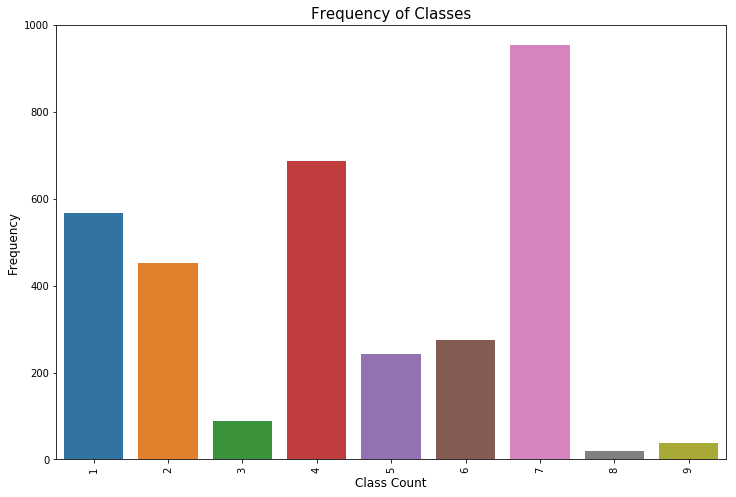

Genes that appear less than 2 times: 26.89%
Genes that appear less than 5 times: 53.03%
Genes that appear less than 10 times: 71.59%
Genes that appear less than 20 times: 82.95%
Genes that appear less than 50 times: 95.08%
Genes that appear less than 100 times: 98.11%
Genes that appear less than 200 times: 99.62%
Genes that appear less than 300 times: 100.0%


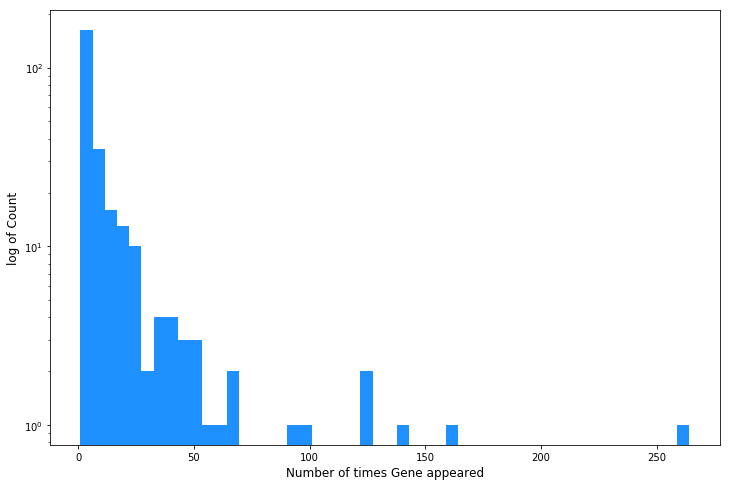

In [50]:
%run ./dataviz_preliminary.ipynb

<h2>
    Warm up models
</h2>

We will start by considering very simple models by exctracting features such as the number of words and characters in the Text columns 

In [54]:
%run naive_wordcount.ipynb

In [55]:
df_train.head()

,ID,Gene,Variation,Class,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39672
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,5756,36691
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,5756,36691
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,5572,36238
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,6202,41308


In [56]:
df_test.head()

,ID,Gene,Variation,Text,num_words,num_chars
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7417,49829
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4710,31326
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,11080,75282
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,8380,53996
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,11159,76967


In [65]:
#Splitting the datas 
from sklearn.model_selection import train_test_split
train, test, train_class, test_class = train_test_split( 
    df_train[['num_words', 'num_chars']], df_train['Class'] , test_size=1/7.0, random_state=0
)

<h3>
    Logistic Regression
</h3>

<h3>
    Lasso & Ridge Regression
</h3>

<h3>
    Knn
</h3>

<h3>
    Decision Tree
</h3>

<h3>
    Random Forest
</h3>

<h3>
    Bagging
</h3>

<h3>
    Boosting
</h3>

<h3>
    LDA
</h3>